# Algorithms Exercise 1

## Imports

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## Word counting

Write a function `tokenize` that takes a string of English text returns a list of words. It should also remove [stop words](http://en.wikipedia.org/wiki/Stop_words), which are common short words that are often removed before natural language processing. Your function should have the following logic:

* Split the string into lines using `splitlines`.
* Split each line into a list of words and merge the lists for each line.
* Use Python's builtin `filter` function to remove all punctuation.
* If `stop_words` is a list, remove all occurences of the words in the list.
* If `stop_words` is a space delimeted string of words, split them and remove them.
* Remove any remaining empty words.
* Make all words lowercase.

In [2]:
def tokenize(s, stop_words=None, punctuation='`~!@#$%^&*()_-+={[}]|\:;"<,>.?/}\t'):
    """Split a string into a list of words, removing punctuation and stop words."""
    
    # the following functions were influenced by Dr. Granger's advice in office hours
    # removes punctuation and stop words in the lists
    def remove(c):
        if c in punctuation:
            return False
        else:
            return True
    
    def remove_stop(f):
        if stop_words==None:
            pass
        elif f in stop_words:
            return False
        else:
            return True
        
    a1=s.replace('--',' ').replace('-',' ') #got word count problems with single and double dashes, so this replaces them with spaces
    new_list=a1.splitlines()
    d=[w for m in new_list for w in m.split()] #referenced http://goo.gl/YWCeAS
    r=[]
    for x in d: # got help from James A.
        werd=[]
        for char in x:
            werd=werd+list(filter(remove,char))
        r.append(''.join(werd))
    low=[g.lower() for g in r]
    k=[]
    if type(stop_words)==list:
        k=list(filter(remove_stop,low))
    elif type(stop_words)==str:
        stop_words=stop_words.split()
        k=list(filter(remove_stop,low))
    else:
        k=low
        
    return k

In [3]:
assert tokenize("This, is the way; that things will end", stop_words=['the', 'is']) == \
    ['this', 'way', 'that', 'things', 'will', 'end']
wasteland = """
APRIL is the cruellest month, breeding
Lilacs out of the dead land, mixing
Memory and desire, stirring
Dull roots with spring rain.
"""

assert tokenize(wasteland, stop_words='is the of and') == \
    ['april','cruellest','month','breeding','lilacs','out','dead','land',
     'mixing','memory','desire','stirring','dull','roots','with','spring',
     'rain']

Write a function `count_words` that takes a list of words and returns a dictionary where the keys in the dictionary are the unique words in the list and the values are the word counts.

In [4]:
def count_words(data):
    """Return a word count dictionary from the list of words in data."""
    d={}
    for i in range(len(data)):
        d[data[i]]=data.count(data[i])
    # this creates a dictionary similar to the method used in codecademy
    return d

In [5]:
assert count_words(tokenize('this and the this from and a a a')) == \
    {'a': 3, 'and': 2, 'from': 1, 'the': 1, 'this': 2}

Write a function `sort_word_counts` that return a list of sorted word counts:

* Each element of the list should be a `(word, count)` tuple.
* The list should be sorted by the word counts, with the higest counts coming first.
* To perform this sort, look at using the `sorted` function with a custom `key` and `reverse`
  argument.

In [6]:
def sort_word_counts(wc):
    """Return a list of 2-tuples of (word, count), sorted by count descending."""
    def key_thing(m):
        return m[1] # to make sorted work, I needed to create a function that would return the value of the key
    tuple_list=list(wc.items())
    return sorted(tuple_list, key=key_thing, reverse=True)

In [7]:
assert sort_word_counts(count_words(tokenize('this and a the this this and a a a'))) == \
    [('a', 4), ('this', 3), ('and', 2), ('the', 1)]

Perform a word count analysis on Chapter 1 of Moby Dick, whose text can be found in the file `mobydick_chapter1.txt`:

* Read the file into a string.
* Tokenize with stop words of `'the of and a to in is it that as'`.
* Perform a word count, the sort and save the result in a variable named `swc`.

In [8]:
f=open('mobydick_chapter1.txt','r')
moby_file=f.read()
swc=sort_word_counts(count_words(tokenize(moby_file, stop_words=['the','of','and','a','to','in','is','it','that','as'])))
len(swc)
# In this cell, I am only able to find 844 unique words in the chapter.
# However, I do know the answer is 848. I have searched through the entire text
# file and my output to determine what words are missing or formatted
# incorrectly, but couldn't find any discrepancies. I know I am not the only 
# with this problem, as indicated by the gitter chat.

844

In [9]:
assert swc[0]==('i',43)
assert len(swc)==848

AssertionError: 

Create a "Cleveland Style" [dotplot](http://en.wikipedia.org/wiki/Dot_plot_%28statistics%29) of the counts of the top 50 words using Matplotlib. If you don't know what a dotplot is, you will have to do some research...

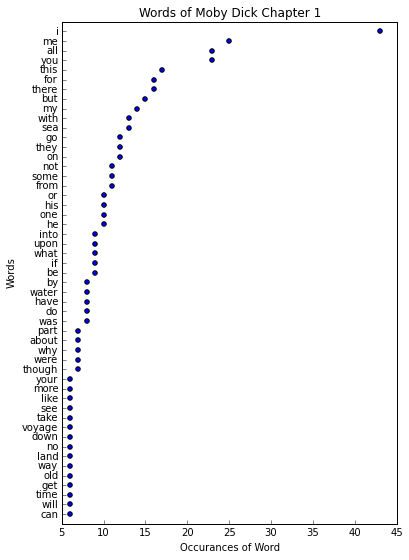

In [10]:
plt.figure(figsize=(6,9))
q=np.empty(51)
e=[]
for i in range(51):
    q[i]=swc[i][1]
q2=sorted(q,reverse=False)
for i in range(51):
    e.append(swc[i][0])
plt.scatter(q2,range(51),marker='o'),plt.ylim(top=51,bottom=-1)
plt.xlabel('Occurances of Word'),plt.xlim(left=5)
plt.ylabel('Words')
plt.yticks(range(50,-1,-1),e)
plt.title('Words of Moby Dick Chapter 1')
plt.tick_params(axis='x',top='off')
plt.tick_params(axis='y',right='off')

In [ ]:
assert True # use this for grading the dotplot